# Clase 20: Ecuaciones diferenciales, método de Taylor

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Una de las principales aplicaciones de los métodos numéricos a la física es la solución de ecuaciones diferenciales. Por ahora nos reduciremos al caso de ecuaciones diferenciales del primer orden. El caso de ecuaciones de orden más alto se reduce al de un sistema de ecuaciones de primer orden y lo veremos más adelante.

En la práctica incluso las ecuaciones diferenciales que queremos resolver son una aproximación al problema físico que tratamos, por este motivo requerimos que pequeños cambios en la formulación de la ecuación no cambien mucho la solución, es decir:

Un problema de valor inicial $y'(t) = f(t, y)$ con $a \leq t \leq b$ y $y(a) = y_o$ está **bien puesto** si 

Existe una solución única para $y(t)$.

Exiten constantes $\epsilon_o > 0$ y $k > 0$ tales que para cualquier $\epsilon \in (0, \epsilon_o)$, cuando $\delta(t)$  es continua y $|\delta(t)| < \epsilon$ para todo $t \in [a,b]$, y cuando $|\delta_o| < \epsilon$, el problema de valor inicial

$$
z'(t) = f(t, z) + \delta(t)\,,\quad a\leq t\leq b\,,\quad z(a) = y_o + \delta_o
$$

tiene una solución única que satisface para todo $t\in [a,b]$

$$
|z(t) - y(t)| < k\epsilon
$$

Nos interesarán ecuaciones diferenciales definidas en el conjunto $a \leq t \leq b$ y $-\infty < y < \infty$. En estos casos el problema está bien puestot si $f$ es continua y en este conjunto

$$
|f(t, y_1) - f(t, y_2)| \leq L|y_1 - y_2|
$$

para alguna constante $L$ (esta se llama condición de Lipfschitz). Se puede demosttrar que esta condición se cumple si se tiene

$$
\left|\frac{\partial f}{\partial y}(t, y)\right| \leq L
$$

## El método de Euler

Hagamos un primer intento de resolver el problema de valor inicial que consideramos. No vamos a obtener una expresión para $y(t)$, si no que vamos a obtener expresiones aproximadas para $y(t_i)$ en algunos puntos $t_i = a + ih$ donde $i = 0, 1, 2, ... N$.

El método más sencillo para lograrlo consiste en usar la expansión de Taylor

$$
y(t_{i+1}) = y(t_i) + (t_{i+1} - t_i)y'(t_i) + \frac{(t_{i+1} - t_i)^2}{2}y''(\xi)\,,
$$

que podemos reescribir

$$
y(t_{i+1}) = y(t_i) + hf(t_i, y(t_i)) + \frac{h^2}{2}y''(\xi)\,,
$$

entonces aproximamos

$$
w_{i+1} = w_i + hf(t_i, w_i).
$$

Este se llama el método de Euler.

In [2]:
def euler(f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w)
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

In [3]:
def f(t, y):
    return y - t**2 + 1

euler(f, 0, 2, 0.5, 10)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([0.5       , 0.8       , 1.152     , 1.5504    , 1.98848   ,
        2.458176  , 2.9498112 , 3.45177344, 3.95012813, 4.42815375,
        4.8657845 ]))

La solución exacta es $y(t) = (t + 1)^2 - 0.5e^t$

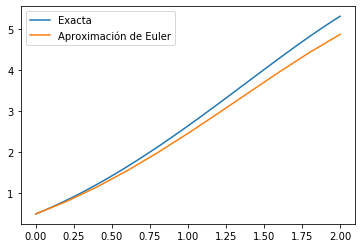

In [4]:
ts = np.linspace(0, 2, 100)
plt.plot(ts, (ts+1)**2 - 0.5*np.exp(ts), label='Exacta')
plt.plot(*euler(f, 0, 2, 0.5, 10), label='Aproximación de Euler')
plt.legend()

Este método es tan sencillo que se puede derivar una cota para el error cometido al $n$-ésimo paso (la derivación se puede encontrar en el libro de Burden):

$$
|y(t_i) - w_i| \leq \frac{hM}{2L}(e^{L(t_i - a)} - 1)
$$

donde $w_i$ son las aproximaciones a cada paso, $L$ es la constante de Lipfschitz, y $M$ es una cota para la segunda derivada de $y$. 

Como esto necesita calcular la segunda derivada, no es muy usado en la práctica, pero aprendemos dos cosas:

* El error es lineal en $h$

* El error crece exponencialmente a medida que nos alejamos del punto inicial.

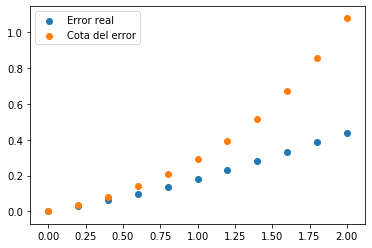

In [5]:
N = 10
ts, sol = euler(f, 0, 2, 0.5, N)
exacta = (ts+1)**2 - 0.5*np.exp(ts)
h = 2/N
M = np.abs(2 - 0.5*np.exp(2))
L = 1
plt.scatter(ts, exacta - sol, label='Error real')
plt.scatter(ts, h*M/(2*L)*(np.exp(L*ts) - 1), label='Cota del error')
plt.legend()

Como vemos, esa fórmula es sólo una cota para el error, que muchas veces puede ser una sobre-estimación.

Además debemos considerar el hecho que puede haber errores de redondeo (u otro tipo de errores intrínsecos) tal que en realidad estamos usando las siguientes aproximaciones:

$$
u(t_o) = y_o + \delta_o
$$

$$
u_{i+1} = u_i + hf(t_i, u_i) + \delta_i
$$

tal que el error en realidad es (derivación en el libro de Burden)

$$
|y(t_i) - u_i| \leq \frac{1}{L}\left(\frac{hM}{2} + \frac{\delta}{h}\right)(e^{L(t_i - a)} - 1) + |\delta_o| e^{L(t_i - a)}
$$

con $|\delta_i| < \delta$.

Como vemos, el método es inestable y de hecho crece a medida que $h$ se hace más pequeño. 

Pero hay una importante diferencia con el caso de las derivadas: En ese caso el error podía ser debido a un error de simulación o de medición que puede ser bastante grande. En este caso el error $\delta_i$ es usualmente un error de redondeo que suele ser demasiado pequeño para ser importante en la práctica. El único error que podría estar sujeto a un error de medición (o simulación) es $\delta_o$ pero su contribución no cambia con $h$.

## Métodos de Taylor de orden más alto

Una manera más práctica de definir el error es usar el **error de truncación local** dado por

$$
\tau_{i+1}(h) = \frac{y_{i+1} - (y_{i} + h\phi(t_i, y_i))}{h}
$$

donde

$$
w_{i+1} =  w_i + h\phi(t_i, w_i)
$$

Para el método de Euler esto es

$$
\tau_{i+1}(h) = \frac{1}{h}(y_{i+1} - y_i) - f(t_i, y_i) = \frac{h}{2}y''(\xi)
$$

Podemos mejorar este error usando expansiones de Taylor de orden más alto

$$
y(t_{i+1}) = y(t_i) + hy'(t_i) + \frac{h^2}{2}y''(t_i) + \dots +\frac{h^n}{n!}y^{(n)}(t_i) + \frac{h^{n+1}}{(n+1)!}y^{(n+1)}(\xi)
$$

es decir

$$
y(t_{i+1}) = y(t_i) + hf(t_i, y(t_i)) + \frac{h^2}{2}\frac{\partial^2 f}{\partial t^2}(t_i, y(t_i)) + \dots +\frac{h^n}{n!}\frac{\partial^n f}{\partial t^n}(t_i, y(t_i)) + \frac{h^{n+1}}{(n+1)!}\frac{\partial^{(n+1)} f}{\partial t^{(n+1)}}(\xi, y(\xi))
$$

entonces hacemos

$$
w_{i+1} = w_i + hf(t_i, w_i) + \frac{h^2}{2}\frac{\partial^2 f}{\partial t^2}(t_i, w_i) + \dots +\frac{h^n}{n!}\frac{\partial^n f}{\partial t^n}(t_i, w_i)
$$

In [6]:
def taylor2(f, df, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w) + h*h*df(t, w)/2
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

In [7]:
def f(t, y):
    return y - t**2 + 1

def df(t, y):
    return f(t,y) - 2*t

taylor2(f, df, 0, 2, 0.5, 10)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([0.5       , 0.83      , 1.2158    , 1.652076  , 2.13233272,
        2.64864592, 3.19134802, 3.74864458, 4.30614639, 4.8462986 ,
        5.34768429]))

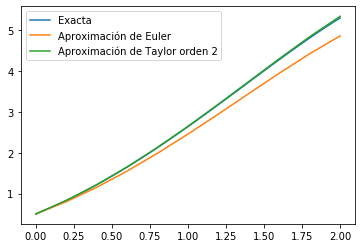

In [8]:
ts = np.linspace(0, 2, 100)
plt.plot(ts, (ts+1)**2 - 0.5*np.exp(ts), label='Exacta')
plt.plot(*euler(f, 0, 2, 0.5, 10), label='Aproximación de Euler')
plt.plot(*taylor2(f, df, 0, 2, 0.5, 10), label='Aproximación de Taylor orden 2')
plt.legend()

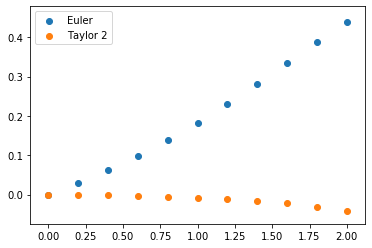

In [9]:
N = 10
ts, sol_e = euler(f, 0, 2, 0.5, N)
ts, sol_t2 = taylor2(f, df, 0, 2, 0.5, N)
exacta = (ts+1)**2 - 0.5*np.exp(ts)
plt.scatter(ts, exacta - sol_e, label='Euler')
plt.scatter(ts, exacta - sol_t2, label='Taylor 2')
plt.legend()

In [10]:
def taylor4(f, df, d2f, d3f, a, b, yo, N):
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*(f(t, w) + h*(df(t, w)/2 + h*(d2f(t, w)/6 + h*d3f(t, w)/24)))
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

In [11]:
def f(t, y):
    return y - t**2 + 1

def df(t, y):
    return f(t,y) - 2*t

def d2f(t, y):
    return df(t, y) - 2

def d3f(t, y):
    return d2f(t, y)

taylor4(f, df, d2f, d3f, 0, 2, 0.5, 10)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([0.5       , 0.8293    , 1.21409102, 1.64894677, 2.12723959,
        2.64087443, 3.17996403, 3.73243207, 4.28352853, 4.81523774,
        5.30555538]))

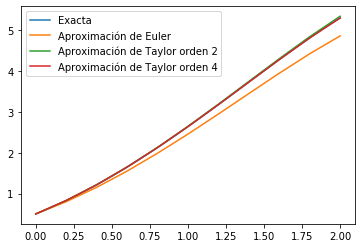

In [12]:
ts = np.linspace(0, 2, 100)
plt.plot(ts, (ts+1)**2 - 0.5*np.exp(ts), label='Exacta')
plt.plot(*euler(f, 0, 2, 0.5, 10), label='Aproximación de Euler')
plt.plot(*taylor2(f, df, 0, 2, 0.5, 10), label='Aproximación de Taylor orden 2')
plt.plot(*taylor4(f, df, d2f, d3f, 0, 2, 0.5, 10), label='Aproximación de Taylor orden 4')
plt.legend()

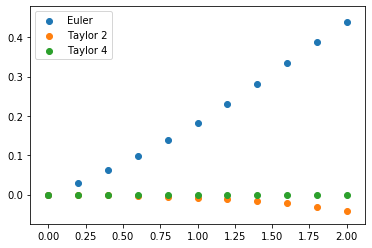

In [13]:
N = 10
ts, sol_e = euler(f, 0, 2, 0.5, N)
ts, sol_t2 = taylor2(f, df, 0, 2, 0.5, N)
ts, sol_t4 = taylor4(f, df, d2f, d3f, 0, 2, 0.5, N)
exacta = (ts+1)**2 - 0.5*np.exp(ts)
plt.scatter(ts, exacta - sol_e, label='Euler')
plt.scatter(ts, exacta - sol_t2, label='Taylor 2')
plt.scatter(ts, exacta - sol_t4, label='Taylor 4')
plt.legend()

El error de truncación local del método de Taylor de orden $n$ es

$$
\tau_{i+1}(h) = \frac{y(t_{i+1}) - y(t_i)}{h} - \left[f(t_i, y(t_i)) + \frac{h}{2}\frac{\partial^2 f}{\partial t^2}(t_i, y(t_i)) + \dots +\frac{h^{n-1}}{n!}\frac{\partial^n f}{\partial t^n}(t_i, y(t_i))\right]
$$

que simplifcando

$$
\tau_{i+1}(h) = \frac{h^n}{(n+1)!}\frac{\partial^{(n+1)} f}{\partial t^{(n+1)}}(\xi, y(\xi))
$$

tal que es de orden $h^n$.

Ahora bien, como tenemos la función en un conjunto de puntos $t_i$, si queremos la función en un punto arbitrario, tenemos que interpolar.

In [14]:
def interp_lin(x, puntosx, puntosy):
    h = puntosx[1] - puntosx[0]
    i = int((x - puntosx[0])/h)
    Lo = puntosy[i]*(x - puntosx[i+1])/(puntosx[i] - puntosx[i+1])
    L1 = puntosy[i+1]*(x - puntosx[i])/(puntosx[i+1] - puntosx[i])
    return Lo + L1

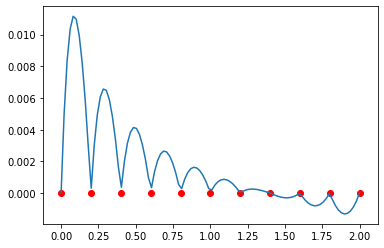

In [15]:
xs = np.linspace(0, 1.999, 100)
ts, aprox = taylor4(f, df, d2f, d3f, 0, 2, 0.5, 10)
interp = [interp_lin(xi, ts, aprox) for xi in xs]
exacta = (xs+1)**2 - 0.5*np.exp(xs)
exactat = (ts+1)**2 - 0.5*np.exp(ts)
plt.plot(xs, (interp - exacta)/exacta)
plt.scatter(ts, (aprox - exactat)/exactat, color='red')

Vemos que la mayor parte del error está siendo inducido por la interpolación. Necesitamos mejorarla.

In [16]:
def interp_hermite(x, puntosx, puntosy, puntosd):
    
    h = puntosx[1] - puntosx[0]
    i = int((x - puntosx[0])/h)
    f1 = (puntosy[i+1] - puntosy[i])/h
    f21 = (f1 - puntosd[i])/h
    f22 = (puntosd[i+1] - f1)/h
    f3 = (f22 - f21)/h
    dx = (x - puntosx[i])
    dx1 = (x - puntosx[i+1])
    
    return puntosy[i] + puntosd[i]*dx + f21*dx*dx + f3*dx*dx*dx1

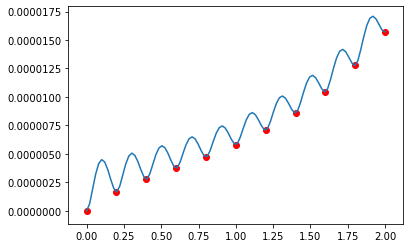

In [17]:
xs = np.linspace(0, 1.999, 100)
ts, aprox = taylor4(f, df, d2f, d3f, 0, 2, 0.5, 10)
daprox = [f(ts[i], aprox[i]) for i in range(len(ts))]
interp = [interp_hermite(xi, ts, aprox, daprox) for xi in xs]
exacta = (xs+1)**2 - 0.5*np.exp(xs)
exactat = (ts+1)**2 - 0.5*np.exp(ts)
plt.plot(xs, (interp - exacta)/exacta)
plt.scatter(ts, (aprox - exactat)/exactat, color='red')

Requiere más operaciones, pero la ganancia en error vale la pena.

Los paquetes modernos dan como output una función interpolante.

 ## Tareas

### Tarea 10.6

Modifique el código de interpolación de Taylor de segundo orden para que regrese una función interpolante de Hermite. Pruebe su código con algún ejemplo.

### Tarea 10.7

Considere la ecuación diferencial que se ha resuelto en los ejemplos de clase:

$$
y'(t) = y(t) - t^2 + 1\,,\quad 0 \leq t \leq 2\,,
$$

pero ahora con una condición inicial

$$
y(0) = 0.5 + \delta_o
$$

donde $\delta_o$ es un error cometido al fijar la condición.

* Resuelva esta ecuación usando el método de Euler con una precisión de $10^{-4}$. Considere varios valores de $\delta_o$ entre $-0.1$ y $0.1$ y grafique $y(2)$ en función de $\delta_o$. 

* Compare su resultado con el valor de $y(2)$ obtenido de la solución analítica $y(t) = (t + 1)^2 - 0.5e^t$. Comente.

### Tarea 10.8

Resuelva el siguiente problema de valor inicial usando el método de Euler y los métodos de Taylor de orden 2 y 3

$$
y'(t) = \frac{\cos(t)}{\sin(y(t))}\,,\quad y(0) = 1\,,\quad 0 \leq t \leq 1
$$

Resuelva la ecuación analíticamente y grafique en función de $h$ el error cometido con los tres métodos para $t = 1$. ¿Es compatible con lo esperado? ¿Por qué?

### Tarea 10.9

Ejercicio 5.3.12 libro de Burden

Un proyectil con masa $m = 0.11$ kg se dispara verticalmente hacia arriba con una velocidad inicial $v(0) = 8$ m/s y sufre una desaceleración debida a la fuerza de la gravedad $F = -mg$ y a la resistencia del aire $F = -kv|v|$, donde $g = 9.8$ m/s^2 y $k = 0.002$ kg/m.

* Encuentre la velocidad a $t = 0.1, 0.2, ..., 1.0$ segundos.
* Encuentre a la primera cifra decimal  el tiempo al cual el proyectil alcanza su máxima altura y vuelve a empezar a caer.

### Tarea 10.10

Ejercicio 5.2.12 libro de Burden

Considere el problema de valor inicial

$$
y'(t) = -10y\,,\quad 0\leq t\leq 2\,,\quad y(0) = 1
$$

que tiene solución $y(t) = e^{-10t}$.¿Qué ocurre cuando el método de Euler se aplica a este problema con $h = 0.1$? ¿Viola la fórmula del error del método?